In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Babai Zhuangshi,1938
1,Dong Xiaowan,1963
2,Forceful Impact,1988
3,Satyagraha,2013
4,Heavenly Claws,2008


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
titles.groupby('title').count().sort_values('year', ascending=False).head(10)

,year
title,
Hamlet,20
Carmen,17
Macbeth,16
Maya,12
Temptation,12
The Outsider,12
Othello,11
The Three Musketeers,11
Honeymoon,11


### Which three years of the 1930s saw the most films released?

In [6]:
titles[titles.year // 10 * 10 == 1930].groupby('year').count().sort_values('title', ascending=False)

,title
year,
1937,1224
1936,1169
1938,1163
1939,1111
1935,1073
1934,1001
1932,964
1933,918
1931,917


### Plot the number of films that have been released each decade over the history of cinema.

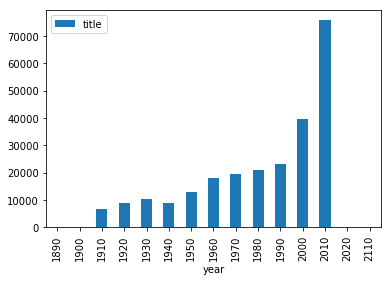

In [7]:
titles.groupby(titles.year // 10 * 10).count()[['title']].sort_index().plot(kind='bar');

In [8]:
titles[titles.year > 2022].sort_values('year', ascending=False)

,title,year
16689,100 Years,2115
33706,The Zero Century: Maetel,2026
188006,Avatar 5,2025
49943,The Dark Room,2024
77649,War in Black,2024
81169,The Dreams I Have,2024
103922,Fantastic Beasts and Where to Find Them 5,2024
133609,Despicable Me 4,2024
226232,Avatar 4,2024
22782,2 Seconds,2023


### Plot the number of "Hamlet" films made each decade.

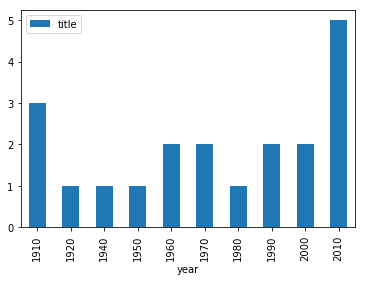

In [9]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).count()[['title']].sort_index().plot(kind='bar');

### Plot the number of "Rustler" characters in each decade of the history of film.

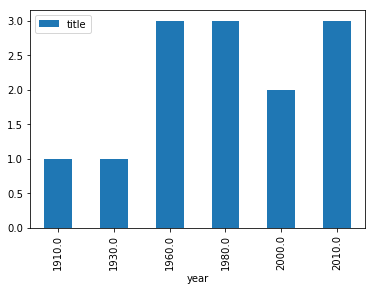

In [10]:
cast[cast.character == 'Rustler'].groupby(titles.year // 10 * 10).count()[['title']].sort_index().plot(kind='bar');

### Plot the number of "Hamlet" characters each decade.

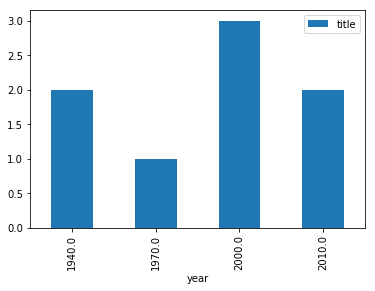

In [11]:
cast[cast.character == 'Hamlet'].groupby(titles.year // 10 * 10).count()[['title']].sort_index().plot(kind='bar');

### What are the 11 most common character names in movie history?

In [12]:
cast[['title', 'character']].groupby('character').count().sort_values('title', ascending=False).head(15)

,title
character,
Himself,20746
Dancer,12477
Extra,11948
Reporter,8434
Student,7773
Doctor,7669
Party Guest,7245
Policeman,7029
Nurse,6999


In [13]:
cast.character.value_counts().head(15).to_frame()

,character
Himself,20746
Dancer,12477
Extra,11948
Reporter,8434
Student,7773
Doctor,7669
Party Guest,7245
Policeman,7029
Nurse,6999
Bartender,6802


### Who are the 10 people most often credited as "Herself" in film history?

In [14]:
cast[cast.character == 'Herself'].groupby('name').count().sort_values('title', ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Queen Elizabeth II,12,12,12,12,0
Joyce Brothers,9,9,9,9,9
Luisa Horga,9,9,9,9,9
Mar?a Luisa (V) Mart?n,9,9,9,9,9
Hillary Clinton,8,8,8,8,0
Margaret Thatcher,8,8,8,8,0
In?s J. Southern,6,6,6,6,6
Marta Berrocal,6,6,6,6,5
Oprah Winfrey,6,6,6,6,2


In [15]:
cast[(cast.character == 'Herself') & (cast.name == 'Queen Elizabeth II')]

,title,year,name,type,character,n
3447468,A Private Function,1984,Queen Elizabeth II,actress,Herself,NaN
3447470,Braindead,1992,Queen Elizabeth II,actress,Herself,NaN
3447472,Hennessy,1975,Queen Elizabeth II,actress,Herself,NaN
3447473,John and Julie,1955,Queen Elizabeth II,actress,Herself,NaN
3447474,Le cerveau,1969,Queen Elizabeth II,actress,Herself,NaN
3447475,One Chance,2013,Queen Elizabeth II,actress,Herself,NaN
3447476,Prick Up Your Ears,1987,Queen Elizabeth II,actress,Herself,NaN
3447477,Queen Elizabeth II: The Diamond Celebration,2012,Queen Elizabeth II,actress,Herself,NaN
3447478,The Calendar,1948,Queen Elizabeth II,actress,Herself,NaN
3447480,The Happy Ending,1969,Queen Elizabeth II,actress,Herself,NaN


### Who are the 10 people most often credited as "Himself" in film history?

In [16]:
cast[cast.character == 'Himself'].groupby('name').count().sort_values('title', ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Adolf Hitler,99,99,99,99,1
Richard Nixon,44,44,44,44,1
Ronald Reagan,41,41,41,41,0
John F. Kennedy,37,37,37,37,1
George W. Bush,25,25,25,25,1
Winston Churchill,24,24,24,24,1
Martin Luther King,23,23,23,23,1
Bill Clinton,22,22,22,22,0
Ron Jeremy,22,22,22,22,17


In [17]:
cast[(cast.character == 'Himself') & (cast.name == 'Adolf Hitler')].head(10)

,title,year,name,type,character,n
1005053,A Clockwork Orange,1971,Adolf Hitler,actor,Himself,NaN
1005055,Anthropoid,2016,Adolf Hitler,actor,Himself,NaN
1005056,Band Waggon,1940,Adolf Hitler,actor,Himself,NaN
1005057,Berlin '36,2009,Adolf Hitler,actor,Himself,NaN
1005058,BloodRayne: The Third Reich,2011,Adolf Hitler,actor,Himself,NaN
1005059,Canaris,1954,Adolf Hitler,actor,Himself,NaN
1005060,Chaplin,1992,Adolf Hitler,actor,Himself,NaN
1005061,Con la muerte en los 2 tacones,2009,Adolf Hitler,actor,Himself,NaN
1005062,Confessions of a Nazi Spy,1939,Adolf Hitler,actor,Himself,NaN
1005063,Contact,1997,Adolf Hitler,actor,Himself,NaN


### Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
cast[cast.year == 1945].groupby('name').count().sort_values('title', ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Emmett Vogan,39,39,39,39,14
Sam (II) Harris,33,33,33,33,0
Harold Miller,29,29,29,29,0
Bess Flowers,29,29,29,29,0
Frank O'Connor,27,27,27,27,1
Nolan Leary,27,27,27,27,0
Franklyn Farnum,27,27,27,27,0
Larry Steers,25,25,25,25,1
Herman Hack,25,25,25,25,0


### Which actors or actresses appeared in the most movies in the year 1985?

In [19]:
cast[cast.year == 1985].groupby('name').count().sort_values('title', ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Mammootty,22,22,22,22,22
Shakti Kapoor,21,21,21,21,13
Sukumari,20,20,20,20,18
Lou Scheimer,15,15,15,15,15
Mohanlal,15,15,15,15,15
Aruna Irani,15,15,15,15,11
Raj Babbar,15,15,15,15,12
Om Shivpuri,13,13,13,13,10
Asrani,13,13,13,13,9


### Plot how many roles Mammootty has played in each year of his career.

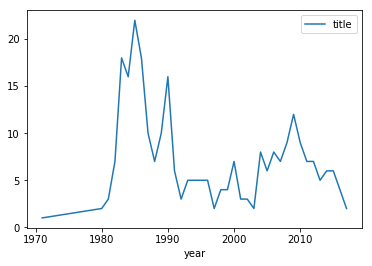

In [20]:
cast[cast.name == 'Mammootty'].groupby('year').count().sort_index()[['title']].plot();

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [21]:
cast[cast.character.str.startswith('Patron in')].groupby('character').count() \
    .sort_values('title', ascending=False).head(10)

,title,year,name,type,n
character,,,,,
Patron in Frisky Rabbit,16,16,16,16,0
Patron in Chinese Restaurant,9,9,9,9,9
Patron in the Coffee House,9,9,9,9,9
Patron in Billiard Parlor,5,5,5,5,5
Patron in Bar,4,4,4,4,1
Patron in restaurant,4,4,4,4,0
Patron in cabaret,3,3,3,3,0
Patron in Restaurant,3,3,3,3,0
Patron in Club,3,3,3,3,3


### What are the 10 most frequent roles that start with the word "Science"?

In [22]:
cast[cast.character.str.startswith('Science')].groupby('character').count() \
    .sort_values('title', ascending=False).head(10)

,title,year,name,type,n
character,,,,,
Science Teacher,60,60,60,60,42
Science Fair Student,9,9,9,9,0
Science Student,9,9,9,9,1
Science Fair Judge,6,6,6,6,5
Science Kid,5,5,5,5,3
Science Promo Cadet,5,5,5,5,4
Science Reporter,5,5,5,5,5
Science Club Member,5,5,5,5,5
Science Fair Kid,5,5,5,5,0


### Plot the n-values of the roles that Judi Dench has played over her career.

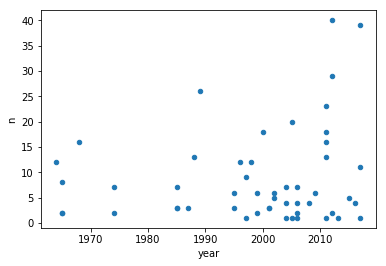

In [23]:
cast[(cast.name == 'Judi Dench') & (cast.n.notnull())] \
  .sort_values(['year', 'n']).plot(kind='scatter', x='year', y='n');

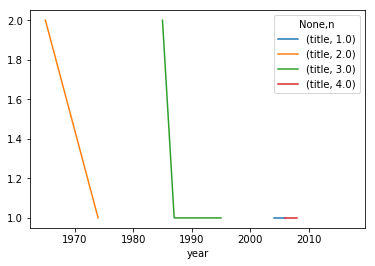

In [24]:
cast[(cast.name == 'Judi Dench') & (cast.n < 5)].groupby(['year', 'n'])[['title']].count() \
  .sort_index().unstack().plot();

### Plot the n-values of Cary Grant's roles through his career.

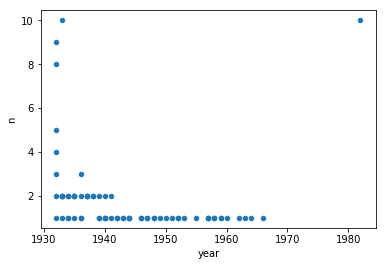

In [25]:
cast[(cast.name == 'Cary Grant') & (cast.n.notnull())] \
  .sort_values(['year', 'n']).plot(kind='scatter', x='year', y='n');

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

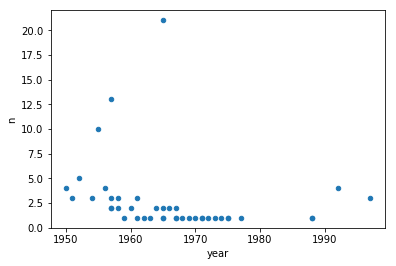

In [26]:
cast[(cast.name == 'Sidney Poitier') & (cast.n.notnull())] \
  .sort_values(['year', 'n']).plot(kind='scatter', x='year', y='n');

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n == 1)].groupby('type').count()[['title']]

,title
type,
actor,6692
actress,3040


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [28]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n == 2)].groupby('type').count()[['title']]

,title
type,
actor,4640
actress,4635
